# Nike Sales Data Cleaning & EDA


---

## Table of Contents
1. [Introduction](#introduction)
2. [Import Libraries](#import-libraries)
3. [Load Data](#load-data)
4. [Initial Data Exploration](#initial-data-exploration)
5. [Missing & Incorrect Data Handling](#data-cleaning)
6. [Consistency & Transformation](#consistency)
7. [Feature Engineering](#feature-engineering)
8. [Outlier Detection](#outlier-detection)
9. [Exploratory Data Analysis (EDA)](#eda)
10. [Conclusion](#conclusion)


## <a name="introduction"></a>1. Introduction
This notebook covers the cleaning and exploratory analysis of Nike's uncleaned sales dataset. We address missing values, data inconsistencies, outliers, and generate insights for further modeling.

## <a name="import-libraries"></a>2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## <a name="load-data"></a>3. Load Data

In [2]:
# Load the dataset
df = pd.read_csv('Nike_Sales_Uncleaned.csv')

## <a name="initial-data-exploration"></a>4. Initial Data Exploration

In [3]:
# Preview the data
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [4]:
# Check tail for last rows
df.tail()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,2025-05-14,Online,Pune,2.97
2496,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2497,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,02-07-2025,Retail,Bangalore,-918.14
2498,4498,Women,Training,ZoomX Invincible,NaN,4.0,5358.70,NaN,0.0,11-12-2024,Online,Mumbai,3352.29
2499,4499,Women,Running,Air Zoom,M,NaN,5550.99,NaN,0.0,23-11-2024,Retail,Mumbai,2453.57


In [5]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


In [6]:
# Summary statistics
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2500.000000,1265.000000,1246.000000,832.000000,2500.000000,2500.000000
mean,3194.352400,1.482213,6039.863395,0.631022,274.873716,1376.012848
std,749.972638,1.696947,2315.746826,0.365500,2023.773550,1478.671013
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.450000
25%,2534.750000,0.000000,4038.902500,0.320000,0.000000,93.532500
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000
75%,3841.250000,3.000000,8022.187500,0.962500,0.000000,2660.645000
max,4499.000000,4.000000,9996.220000,1.250000,37169.350000,3999.210000


## <a name="data-cleaning"></a>5. Missing & Incorrect Data Handling

In [7]:
# Convert Order_Date to datetime and fill missing values
df['Order_Date'] = df['Order_Date'].astype('datetime64[ns]').ffill()

# Handle Units_Sold: clip negatives, fill NA
df['Units_Sold_Positive'] = df['Units_Sold'].clip(lower=0).fillna(0).astype('int')
df['Units_Returned'] = df[df['Units_Sold'] < 0]['Units_Sold'].abs()
df['Units_Returned'] = df['Units_Returned'].fillna(0).astype('int')
df = df.drop(columns='Units_Sold')

# Fill Discount_Applied
df['Discount_Applied'] = df['Discount_Applied'].fillna(0)

# Handle Profit and Loss
df['Loss'] = df[df['Profit'] < 0]['Profit'].abs()
df['Loss'] = df['Loss'].fillna(0)
df['Profit'] = df['Profit'].clip(lower=0)

# Fill missing MRP with mean per Product_Line
df['MRP'] = df['MRP'].fillna(df.groupby('Product_Line')['MRP'].transform('mean').round(2))

# Fill missing Size with mode per Product_Line
df['Size'] = df['Size'].fillna(df.groupby('Product_Line')['Size'].transform(lambda x: x.mode()[0]))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_ID             2500 non-null   int64         
 1   Gender_Category      2500 non-null   object        
 2   Product_Line         2500 non-null   object        
 3   Product_Name         2500 non-null   object        
 4   Size                 2500 non-null   object        
 5   MRP                  2500 non-null   float64       
 6   Discount_Applied     2500 non-null   float64       
 7   Revenue              2500 non-null   float64       
 8   Order_Date           2500 non-null   datetime64[ns]
 9   Sales_Channel        2500 non-null   object        
 10  Region               2500 non-null   object        
 11  Profit               2500 non-null   float64       
 12  Units_Sold_Positive  2500 non-null   int64         
 13  Units_Returned       2500 non-nul

## <a name="consistency"></a>6. Consistency & Transformation

In [8]:
# Consistent date and region formatting
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Region'] = df['Region'].str.title()
df['Region'] = df['Region'].replace(['Hyd','Hyderabad','hyderbad','Hyderbad'], 'Hyderabad')
df['Region'].unique()

array(['Bengaluru', 'Hyderabad', 'Mumbai', 'Pune', 'Delhi', 'Bangalore',
       'Kolkata'], dtype=object)

In [9]:
# Uniform discount formatting
df['Discount_Applied'] = df['Discount_Applied'].apply(lambda x: f"{x:.2f}").astype(float)

## <a name="feature-engineering"></a>7. Feature Engineering

In [10]:
# Set Revenue to 0 if unit is returned
df.loc[(df['Units_Returned'] == 0) & (df['Revenue'] < 0), 'Revenue'] = 0

# Flag outliers for key columns using IQR
def flag_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[f'{col}_outlier'] = ~df[col].between(lower, upper)
    df[f'{col}_outlier'] = df[f'{col}_outlier'].astype(int)

for col in ['MRP','Revenue', 'Profit', 'Loss']:
    flag_outliers_iqr(df, col)

## <a name="outlier-detection"></a>8. Outlier Detection

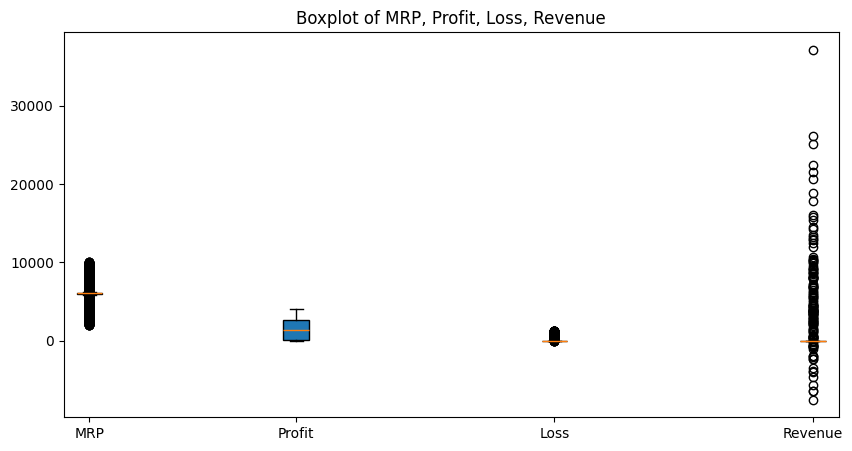

In [11]:
# Boxplot of key variables
plt.figure(figsize=(10,5))
plt.boxplot([df['MRP'],df['Profit'],df['Loss'],df['Revenue']],
            positions=[1,5,10,15], patch_artist=True)
plt.title('Boxplot of MRP, Profit, Loss, Revenue')
plt.xticks([1,5,10,15], ['MRP', 'Profit', 'Loss','Revenue'])
plt.show()

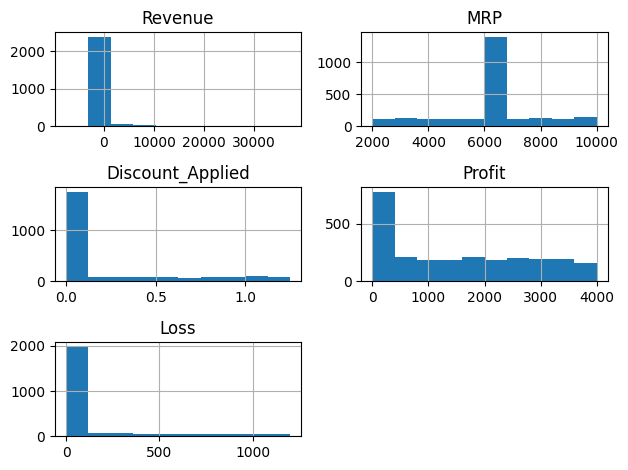

In [12]:
# Histograms
df[['Revenue','MRP','Discount_Applied','Profit','Loss']].hist()
plt.tight_layout()
plt.show()

## <a name="eda"></a>9. Exploratory Data Analysis (EDA)

### Distribution Analysis

In [13]:
# Product line distribution
df['Product_Line'].value_counts()

Product_Line
Training      546
Basketball    507
Lifestyle     501
Running       474
Soccer        472
Name: count, dtype: int64

In [14]:
# Product line and size relationship
df.groupby('Product_Line')['Size'].value_counts()

Product_Line  Size
Basketball    XL      228
              L       109
              M        85
              11       17
              10       14
              6        13
              12       12
              9        11
              7        10
              8         8
Lifestyle     L       213
              XL      107
              M        84
              7        18
              9        18
              10       13
              11       13
              6        13
              8        12
              12       10
Running       L       205
              XL       91
              M        85
              7        19
              10       17
              11       12
              6        12
              8        12
              12       11
              9        10
Soccer        M       207
              XL       85
              L        81
              7        20
              10       17
              9        15
              8        14
              11   

### Sales by Product Line

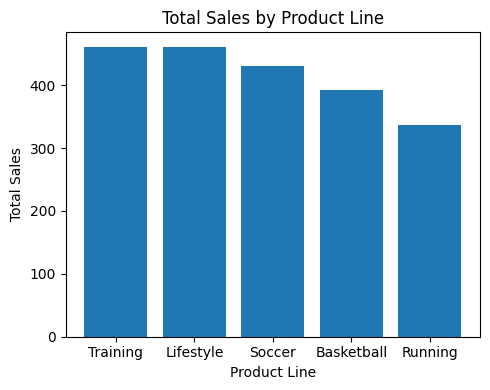

In [15]:
product_sales = df.groupby('Product_Line')['Units_Sold_Positive'].sum()
product_sales.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(5,4))
plt.bar(product_sales.index, product_sales.values)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.tight_layout()
plt.show()

### Total Sales by Region 

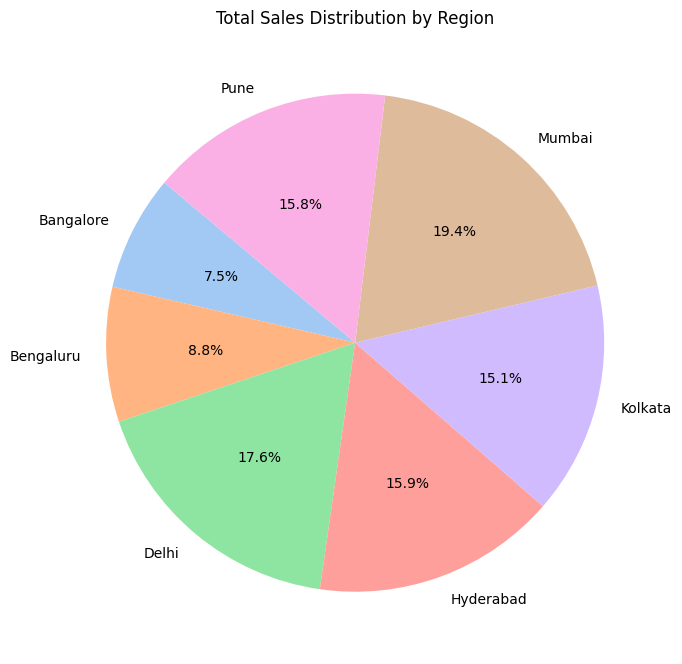

In [16]:

region_sales = df.groupby("Region")["Units_Sold_Positive"].sum()
plt.figure(figsize=(7, 7))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Total Sales Distribution by Region")
plt.tight_layout()
plt.show()

### Size Category Engineering Example

In [17]:
# Convert Size to numeric and categorize
numeric_size = pd.to_numeric(df['Size'], errors='coerce')
bins = [6, 9, 11, 12]
labels = ['M', 'L', 'XL']
df['Size_Category'] = pd.cut(numeric_size, bins=bins, labels=labels, right=True)
display(df['Size_Category'].value_counts())

Size_Category
M     214
L     153
XL     61
Name: count, dtype: int64

### Correlation Analysis

In [19]:
df.select_dtypes(include=['number']).corr()['MRP']

Order_ID              -0.035489
MRP                    1.000000
Discount_Applied       0.042300
Revenue                0.053488
Profit                -0.031869
Units_Sold_Positive   -0.017924
Units_Returned        -0.006522
Loss                   0.022003
MRP_outlier           -0.000813
Revenue_outlier        0.002433
Profit_outlier              NaN
Loss_outlier           0.020668
Name: MRP, dtype: float64

## <a name="conclusion"></a>10. Conclusion

This notebook demonstrates the professional cleaning, transformation, and exploration of Nike sales data. The workflow ensures:
- Data consistency and handling of missing/incorrect values
- Outlier flagging and visualization
- Feature engineering for improved analysis
- EDA for actionable business insights

---

### **Tips for Professional Notebooks**
- Use **markdown cells** for explanations and section headers.
- Comment code blocks and explain each step.
- Visualize key results (plots, tables).
- Keep cell outputs relevant and clean.
- Add a summary/conclusion.